# HYGIENE PREDICTION OF FOOD CHAIN ESTABLISHMENTS IN FRANCE BASED ON DATA OF ALIM'CONFIANCE : COMPARISON OF MACHINE LEARNING MODEL WITH CLASSIFICATION PROBLEM 

<h3>Machine learning project<h3> <br>

1. Abstract
2. Introduction
3. Machine learning model computational
4. Result and Discussion
5. Conclusion<br>
    
    
Machine learning model,classification problem:<br>    
    

* K Nearest Neigbor classifier
* Gradient Boosting classifier
* Random Forest classifier
* Neural NetWork <br>
    
    
With cross validation,

- we will apply our machine learning 
- we will apply the hyperparameter for each model to search the best parameter value to optimize our model
 

# ABSTRACT


The precise health hygiene prediction of food chain establishments in France has many applications for hygiene monitoring in the various establishments of the food chain as well as the planning of food health controls in these establishments.
Descriptive statistical methods have been used to provide information on the level of hygiene of these establishments. This study aims to predict the health hygiene of food chain establishments using data from Alim'Confiance by machine learning models.
Machine learning models by the optimization of hyperparameters with cross-validation have been induced to predict the health hygiene of the establishments of the food chain in France.
We then compared 4 machine learning models to find out the most robust model in terms of prediction using the models such as K Nearest Neighbord,Gradient Boosting classified, Random forest classified and Neural Network.It was concluded that the prediction performance of the Random forest Classifier was significantly robust with an 85% score in automatic and hyperparametre.
but with the hyperparameter, we noticed in the Gradient boosting classifier model that if we increase the number of classification tree estimates by controlling the learning process, we will have a better classification than the random forest.


# INTRODUCTION

Like the saying goes, “A healthy people, is a healthy nation.”
For people to stay healthy, it is important that some measures of hygiene are considered when handling food and drinks. Food hygiene can therefore be defined as the handling, preparing, and storing food or drinks in a way that best minimizes the risk of consumers becoming sick from the food-borne disease. The overall purpose of food hygiene is to prepare and provide safe food and consequently contribute to a healthy and productive society.

The Federal Ministry of Agriculture and L’alimentation, France took the initiative towards boosting the confidence of the people regarding the level of sanitary measures maintained in various food chain (restaurants, canteens, and slaughterhouses, etc..) in France.
The publication of the result of health checks in the food sector is a legitimate expectation of citizens which contributes to improving consumer confidence. Provided by the law of the future for agriculture, food, and forestry, of October 13, 2014, this measure is part of an evolution towards greater transparency of state action.
Alim’confiance, the dataset on which we worked on comes from a certified public service. On its application as well as its website www.alim-confiance.gouv.fr , consumers can have access to the results of health checks carried out in all establishments in the food chain. The result allows you to know the overall level of hygiene of the food establishment and gives you an idea of compliance with hygiene standards: cleanliness of premises and equipment, hygiene of staff and handling, respect for the supply chain.

Various Machine Learning ML  have been  applied on sanitary, health, biological data  and more.
Machine learning procedures will be carried out on Alim’Confiance data to classify the various food chain according to their level of compliance into Satisfactory, Very Satisfactory, To improve, and To be Corrected Urgently.



# PROCEDURE

First we preprocessed the data, second we split de data on train and test set with 70% of the train set and 30% of the test set , and next was the classification according to the results generated from the four methods of classification used (K Nearest Classifier, Gradient Boosting Classifier, Random Forest Classifier, and Neural Network). With Cross validation, we splitted the data into 5 train sets, test sets and fit the models to predict our target and evaluate the score of each models then we will applied the hyperparameter optimization on the 4 models of classification to get the best value of parameter to optimize our models. Regarding data visualization, we did Descriptive Statistics.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import model_selection
import sklearn as read_csv
import numpy as np
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import numpy as np
from random import shuffle
from operator import itemgetter
from sklearn import preprocessing
from gplearn.genetic import SymbolicRegressor
from sklearn.utils.random import check_random_state
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from matplotlib import pyplot
#We choose 5 cross validation for our machine learning model
n_folds = KFold(n_splits =5,shuffle= False )
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import jaccard_score

import xgboost as xgb
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold # evaluate a given model using cross-validation

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from itertools import cycle
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# CLASSIFICATION DATA

In [2]:
df=pd.read_csv("export_alimconfiance.csv", error_bad_lines=False,sep=';')

In [3]:
df.head()

,APP_Libelle_etablissement,SIRET,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,NATURALIA FRANCE,30247464801340,92370,CHAVILLE,15574758,2020-06-08T02:00:00+02:00,Alimentation générale,Très satisfaisant,NaN,"48.808791,2.188615",Alimentation générale,Autres
1,NATURALIA (NATURALIA FRANCE),30247464800573,92800,PUTEAUX,15765263,2020-10-27T01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.891775,2.241034",Alimentation générale,Autres
2,NATURALIA FRANCE,30247464800409,92500,RUEIL MALMAISON,15622009,2020-07-08T02:00:00+02:00,Alimentation générale,Très satisfaisant,NaN,"48.878679,2.181655",Alimentation générale,Autres
3,LA FROMAGEE JEAN YVES BORDIER,30445415000109,94100,SAINT MAUR DES FOSSES,15843816,2020-12-04T01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.803811,2.485354",Alimentation générale,Autres
4,NATURALIA FRANCE,30247464801134,92500,RUEIL MALMAISON,15600626,2020-06-23T02:00:00+02:00,Alimentation générale,Très satisfaisant,NaN,"48.862706,2.193011",Alimentation générale,Autres


In [4]:
df.dtypes

APP_Libelle_etablissement             object
SIRET                                 object
Code_postal                           object
Libelle_commune                       object
Numero_inspection                     object
Date_inspection                       object
APP_Libelle_activite_etablissement    object
Synthese_eval_sanit                   object
Agrement                              object
geores                                object
filtre                                object
ods_type_activite                     object
dtype: object

In [5]:
df.shape

(30799, 12)

In [6]:
df.columns

Index(['APP_Libelle_etablissement', 'SIRET', 'Code_postal', 'Libelle_commune',
       'Numero_inspection', 'Date_inspection',
       'APP_Libelle_activite_etablissement', 'Synthese_eval_sanit', 'Agrement',
       'geores', 'filtre', 'ods_type_activite'],
      dtype='object')


## health control of food establishment chains
[Link of data](https://data.opendatasoft.com/explore/dataset/export_alimconfiance%40dgal/table/?disjunctive.app_libelle_activite_etablissement&disjunctive.filtre&disjunctive.ods_type_activite)


3.Information about our target(multiclass classification problem)

Official food safety checks released on March 1, 2017.

Mentions of the 4 levels of hygiene:

Very satisfactory level of hygiene: establishments that do not comply, or have only minor non-compliances.

Satisfactory level of hygiene: establishments with non-compliances that do not justify the adoption of administrative police measures but to which the administrative authority sends a letter of reminder of the regulations in order to improve practices.

Hygiene level to be improved: establishments whose operator has been ordered to take corrective action within a time frame set by the administrative authority and which leads to a new control of the state services to verify the implementation of these corrective measures.

Hygiene level to be urgently corrected:
establishments with non-compliances that could endanger the health of the consumer and for which the administrative authority orders administrative closure, withdrawal, or suspension of health accreditation.

5. Number of Instances: 30799
6. Number of Attributes: 12 
  
 
7. Attribute information:

   1. APP_Libelle_etablissement- wording of the establishment activities
   2. Synthese_eval_sanit- health evaluation synthese (our target)
   3. filtre 
   4. ods_type_activite - type of activities
   5. SIRET- Establishment SIRET
   6. Code_postal - establishment ZIP CODE 
   7. Libelle_commune- wording of common establishment
   8. Numero_inspection - Inspection number
   9. Date_inspection - Inspection date
   10. Agrement
   11. geores 
  
8. Missing Attribute Values: 31444

# Multiclass:

In [6]:
c=df['Synthese_eval_sanit'].value_counts()

In [7]:
#We can see the imbanlance class on our target
c

Satisfaisant                     15575
Très satisfaisant                13334
A améliorer                       1780
A corriger de manière urgente      110
Name: Synthese_eval_sanit, dtype: int64

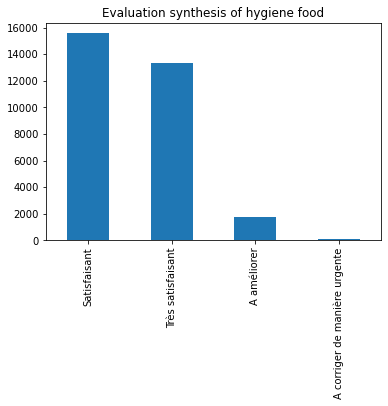

In [8]:
df['Synthese_eval_sanit'].value_counts(normalize=False).plot(kind = 'bar', title = "Evaluation synthesis of hygiene food")

# Check NaN on the data:

In [9]:
df.isnull().sum()

APP_Libelle_etablissement                 0
SIRET                                     0
Code_postal                               0
Libelle_commune                           0
Numero_inspection                         0
Date_inspection                           0
APP_Libelle_activite_etablissement        0
Synthese_eval_sanit                       0
Agrement                              21665
geores                                  777
filtre                                 9002
ods_type_activite                         0
dtype: int64

# Data cleaning and processing for machine learning model

# Data cleaning:

In [10]:
# determine categorical and numerical features
numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = df.select_dtypes(include=['object', 'bool']).columns

In [11]:
print('numerical variable:')
print( numerical_ix )

numerical variable:
Index([], dtype='object')


In [12]:
print('categorical variable')
print(categorical_ix )

categorical variable
Index(['APP_Libelle_etablissement', 'SIRET', 'Code_postal', 'Libelle_commune',
       'Numero_inspection', 'Date_inspection',
       'APP_Libelle_activite_etablissement', 'Synthese_eval_sanit', 'Agrement',
       'geores', 'filtre', 'ods_type_activite'],
      dtype='object')


In [13]:
df.Agrement.describe()

count         9134
unique        7211
top       72080002
freq            11
Name: Agrement, dtype: object

In [14]:
df['Agrement'].fillna('72080002',inplace=True)

In [15]:
df.geores.describe()

count                  30022
unique                 25481
top       42.565838,8.756981
freq                      19
Name: geores, dtype: object

In [16]:
df['geores'].fillna('42.565838,8.756981',inplace=True)

In [17]:
df.ods_type_activite.describe()

count      30799
unique         7
top       Autres
freq       22362
Name: ods_type_activite, dtype: object

In [18]:
df['ods_type_activite'].fillna('Autres',inplace=True)

In [19]:
df.filtre.describe()

count          21797
unique            92
top       Restaurant
freq            9240
Name: filtre, dtype: object

In [20]:
df['filtre'].fillna('Restaurant',inplace=True)

In [21]:
df.isnull().sum()

APP_Libelle_etablissement             0
SIRET                                 0
Code_postal                           0
Libelle_commune                       0
Numero_inspection                     0
Date_inspection                       0
APP_Libelle_activite_etablissement    0
Synthese_eval_sanit                   0
Agrement                              0
geores                                0
filtre                                0
ods_type_activite                     0
dtype: int64

# Data preprocessing:

# Data encoding for categorical variables:

In [22]:
encoded=df[['APP_Libelle_etablissement', 'SIRET', 'Code_postal', 'Libelle_commune',
       'Numero_inspection', 'Date_inspection',
       'APP_Libelle_activite_etablissement', 'Synthese_eval_sanit', 'Agrement',
       'geores', 'filtre', 'ods_type_activite']].apply(LabelEncoder().fit_transform)

In [23]:
# Adding both the dataframes encoded and remaining (without encoding)
data =pd.concat([encoded], axis=1)

In [24]:
data.head()

,APP_Libelle_etablissement,SIRET,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,18097,3226,4611,1257,498,114,1,3,5386,16397,0,1
1,18096,3219,4622,5483,1265,231,1,2,5386,21291,0,1
2,18097,3215,4619,6016,671,140,1,3,5386,20326,0,1
3,12946,3273,4666,6314,1363,263,1,3,5386,16334,0,1
4,18097,3225,4619,6016,560,126,1,3,5386,18984,0,1


In [25]:
c2=data['Synthese_eval_sanit'].value_counts()

In [26]:
#We can see the imbanlance class on our target with numerical value after use the encoding algorithm.
#To perform our model we neeed to use the imbalanced learning before to apply Machine learning model for
#Good classification with imblearn package.
c2

2    15575
3    13334
0     1780
1      110
Name: Synthese_eval_sanit, dtype: int64

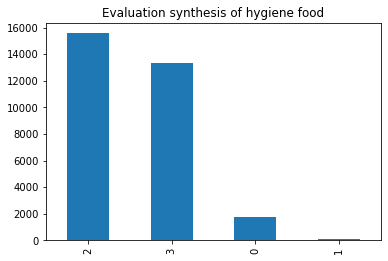

In [27]:
data['Synthese_eval_sanit'].value_counts(normalize=False).plot(kind = 'bar', title = "Evaluation synthesis of hygiene food")

In [28]:
data.columns

Index(['APP_Libelle_etablissement', 'SIRET', 'Code_postal', 'Libelle_commune',
       'Numero_inspection', 'Date_inspection',
       'APP_Libelle_activite_etablissement', 'Synthese_eval_sanit', 'Agrement',
       'geores', 'filtre', 'ods_type_activite'],
      dtype='object')

In [29]:
X=data[['APP_Libelle_etablissement', 'SIRET', 'Code_postal', 'Libelle_commune',
       'Numero_inspection', 'Date_inspection',
       'APP_Libelle_activite_etablissement', 'Agrement',
       'geores', 'filtre', 'ods_type_activite']]

In [30]:
y=data['Synthese_eval_sanit']

# IMBALANCED LEARNING

In [31]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)


In [32]:
print(X_ros.shape,y_ros.shape)

(62300, 11) (62300,)


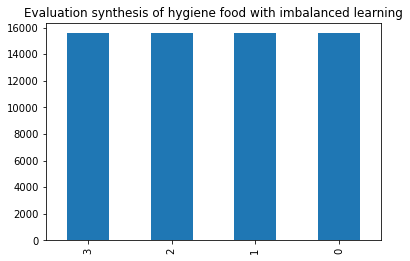

In [33]:
y_ros.value_counts(normalize=False).plot(kind = 'bar', title = "Evaluation synthesis of hygiene food with imbalanced learning")

# Standard scaling:

In [34]:
#Split data in training and testing sample with 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 42)

In [35]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(43610, 11) (18690, 11) (43610,) (18690,)


In [36]:
#Nous pouvons maintenant standardiser les variables, 
#c'est-à-dire les centrer (ramener leur moyenne à 0) 
#et les réduire (ramener leur écart-type à 1), 
#afin qu'elles se placent toutes à peu près sur la même échelle
# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)
x_train_std = std_scale.transform(X_train)
x_test_std = std_scale.transform(X_test)

# MACHINE LEARNING MODEL

# K Nearest Neighbors(KNN) MODEL

In [178]:
knn = KNeighborsClassifier()
knn.fit(x_train_std,y_train)

KNeighborsClassifier()

In [179]:
y_pred = knn.predict(x_test_std)

In [180]:
knn.score(x_train_std,y_train)

0.814813116257739

In [181]:
knn.score(x_test_std,y_test)

0.7380417335473515

# KNN CROSS VALIDATION

In [182]:
accuracy_train=cross_val_score(knn,x_train_std,y_train,cv=n_folds,scoring ='accuracy')

accuracy_test=cross_val_score(knn,x_test_std,y_test,cv=n_folds,scoring ='accuracy')

In [183]:
print(accuracy_train.mean())

0.7142627837651915


In [184]:
print(accuracy_test.mean())

0.6466559657570894


In [40]:
#CONFRONTATION ENTRE Y OBSERVEE SUR L ECHANTILLON TEST ET LA PREDICTION
#PERMET DE VERIFIER SUR NOTRE CLASSIFICATION EST BONNE OU PAS ICI SCORE = VAL(matrixCONFUSION) DONC OK
confusion_mtx1=confusion_matrix(y_test,y_pred)

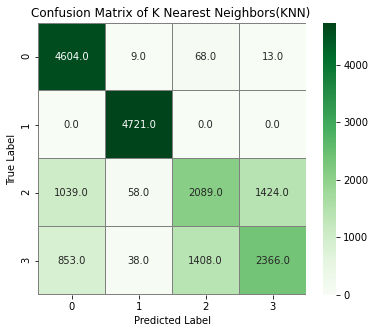

In [41]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(confusion_mtx1, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of K Nearest Neighbors(KNN) ")
plt.show()

In [188]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('Results on the test set with K Nearest Neighbors:')
print(classification_report(y_test, y_pred))

Results on the test set with K Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.71      0.98      0.82      4694
           1       0.98      1.00      0.99      4721
           2       0.59      0.45      0.51      4610
           3       0.62      0.51      0.56      4665

    accuracy                           0.74     18690
   macro avg       0.72      0.74      0.72     18690
weighted avg       0.73      0.74      0.72     18690



# HYPERPARAMETER OF KNN MODEL

In [43]:
#Performing cross validation
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
#perform 5 fold cross validation
for k in range(1,51,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,x_train_std,y_train,cv=5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1 


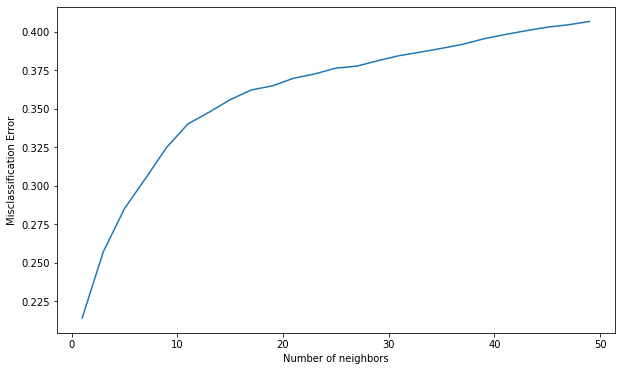

In [44]:
#Misclassification error versus k
MSE = [1-x for x in cv_scores]

#determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d ' %optimal_k)

#plot misclassification error versus k

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [45]:
knnhyp = KNeighborsClassifier(n_neighbors = 1)
knnhyp.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
scores =knnhyp.score(x_train_std,y_train)
print('K Neightbors classifier Optimization train score: ' + str(scores))

K Neightbors classifier Optimization train score: 1.0


In [47]:
scores = knnhyp.score(x_test_std, y_test)
print('K Neightbors classifierclassifier Optimization test score: ' + str(scores))

K Neightbors classifierclassifier Optimization test score: 0.7986623863028357


# KNN CROSS VALIDATION WITH HYPERPARAMETER VALUE

In [185]:
accuracy_train=cross_val_score(knnhyp,x_train_std,y_train,cv=n_folds,scoring ='accuracy')

accuracy_test=cross_val_score(knnhyp,x_test_std,y_test,cv=n_folds,scoring ='accuracy')

In [186]:
print(accuracy_train.mean())

0.7843384544829168


In [187]:
print(accuracy_test.mean())

0.7254146602461209


In [48]:
y_predknn = knnhyp.predict(x_test_std)

In [49]:
#CONFRONTATION ENTRE Y OBSERVEE SUR L ECHANTILLON TEST ET LA PREDICTION
#PERMET DE VERIFIER SUR NOTRE CLASSIFICATION EST BONNE OU PAS ICI SCORE = VAL(matrixCONFUSION) DONC OK
confusion_mtx1HYPOPT=confusion_matrix(y_test,y_predknn)

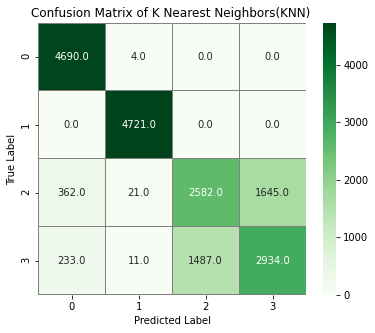

In [50]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(confusion_mtx1HYPOPT, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of K Nearest Neighbors(KNN) ")
plt.show()

In [189]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('Results on the test set with hyperparameter with K nearest Neighbors:')
print(classification_report(y_test, y_predknn))

Results on the test set with hyperparameter with K nearest Neighbors:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4694
           1       0.99      1.00      1.00      4721
           2       0.63      0.56      0.59      4610
           3       0.64      0.63      0.63      4665

    accuracy                           0.80     18690
   macro avg       0.79      0.80      0.79     18690
weighted avg       0.79      0.80      0.79     18690



# GRADIENT  BOOSTING CLASSIFIER MODEL

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb = GradientBoostingClassifier()

modelgb.fit(x_train_std,y_train)

GradientBoostingClassifier()

In [38]:
scores = modelgb.score(x_train_std,y_train)
print('Gradient boosting classifier train score: ' + str(scores))

Gradient boosting classifier train score: 0.6401742719559734


In [39]:
scores = modelgb.score(x_test_std, y_test)
print('Gradient boosting classifier test score: ' + str(scores))

Gradient boosting classifier test score: 0.6234349919743178


# Gradient boosting cross validation:

In [193]:
accuracy_train=cross_val_score(modelgb,x_train_std,y_train,cv=n_folds,scoring ='accuracy')

accuracy_test=cross_val_score(modelgb,x_test_std,y_test,cv=n_folds,scoring ='accuracy')

In [194]:
print(accuracy_train.mean())

0.6304975922953451


In [195]:
print(accuracy_test.mean())

0.6267522739432853


In [196]:
predictions = modelgb.predict(x_test_std)

In [197]:
from sklearn.metrics import confusion_matrix
confusion_mtx2=confusion_matrix(y_test,predictions)

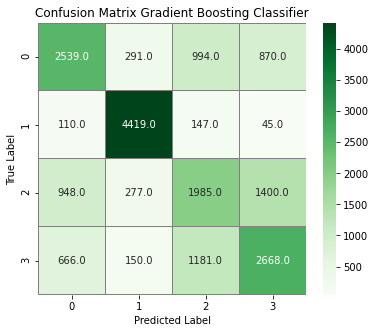

In [198]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(confusion_mtx2, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gradient Boosting Classifier")
plt.show()

In [199]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('Results on the test set with gradient Boosting:')
print(classification_report(y_test,predictions))

Results on the test set with gradient Boosting:
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      4694
           1       0.86      0.94      0.90      4721
           2       0.46      0.43      0.45      4610
           3       0.54      0.57      0.55      4665

    accuracy                           0.62     18690
   macro avg       0.61      0.62      0.62     18690
weighted avg       0.61      0.62      0.62     18690



# HYPERPARAMETER OF GRADIENT BOOSTING CLASSIFIER

In [200]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000,10000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models

In [201]:

def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

>10 0.489 (0.009)
>50 0.576 (0.007)
>100 0.627 (0.005)
>500 0.708 (0.005)
>1000 0.735 (0.006)
>5000 0.774 (0.005)
>10000 0.773 (0.005)


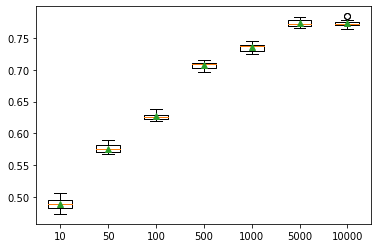

In [202]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, x_test_std, y_test)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [203]:
modelgbhpop = GradientBoostingClassifier(n_estimators=10000)

modelgbhpop.fit(x_train_std,y_train)

GradientBoostingClassifier(n_estimators=10000)

In [204]:
scores = modelgbhpop.score(x_train_std,y_train)
print('Gradient boosting classifier Optimization train score: ' + str(scores))

Gradient boosting classifier Optimization train score: 0.997133684934648


In [205]:
scores = modelgbhpop.score(x_test_std, y_test)
print('Gradient boosting classifier Optimization test score: ' + str(scores))

Gradient boosting classifier Optimization test score: 0.8460139111824505


# GRADIENT BOOSTING CROSS VALIDATION WITH HYPERPARAMETER

In [206]:
accuracy_train=cross_val_score(modelgbhpop,x_train_std,y_train,cv=n_folds,scoring ='accuracy')

accuracy_test=cross_val_score(modelgbhpop,x_test_std,y_test,cv=n_folds,scoring ='accuracy')

In [207]:
print(accuracy_train.mean())

0.8343269892226554


In [208]:
print(accuracy_test.mean())

0.7732477260567149


In [209]:
y_predbosting = modelgbhpop.predict(x_test_std)

In [210]:
from sklearn.metrics import confusion_matrix
confusion_mtx2hypopt=confusion_matrix(y_test,y_predbosting)

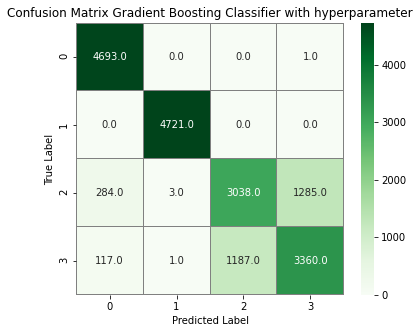

In [211]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(confusion_mtx2hypopt, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gradient Boosting Classifier with hyperparameter")
plt.show()

In [212]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('Results on the test set with hyperparameter with Gradient Boosting:')
print(classification_report(y_test, y_predbosting))

Results on the test set with hyperparameter with Gradient Boosting:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4694
           1       1.00      1.00      1.00      4721
           2       0.72      0.66      0.69      4610
           3       0.72      0.72      0.72      4665

    accuracy                           0.85     18690
   macro avg       0.84      0.84      0.84     18690
weighted avg       0.84      0.85      0.84     18690



# RANDOM FOREST CLASSIFIER

In [213]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train_std, y_train)

RandomForestClassifier()

In [214]:
acc = model.score(x_train_std, y_train)
print('Random Forest train score: ' + str(acc))

Random Forest train score: 1.0


In [215]:
scores = model.score(x_test_std, y_test)
print('Random Forest test score: ' + str(scores))

Random Forest test score: 0.8505082932049224


# Random Forest Cross Validation Score:

In [216]:
accuracy_train=cross_val_score(model,x_train_std,y_train,cv=n_folds,scoring ='accuracy')

accuracy_test=cross_val_score(model,x_test_std,y_test,cv=n_folds,scoring ='accuracy')

In [217]:
print(accuracy_train.mean())

0.8381105251089199


In [218]:
print(accuracy_test.mean())

0.7813804173354735


In [219]:
y_pred = model.predict(x_test_std)

In [220]:
from sklearn.metrics import confusion_matrix
confusion_mtx3=confusion_matrix(y_test,y_pred)

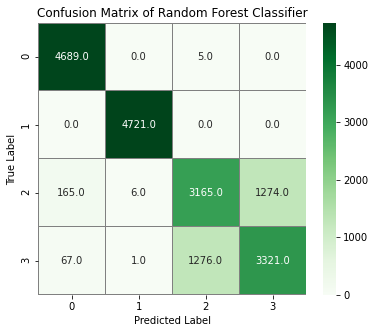

In [221]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(confusion_mtx3, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Random Forest Classifier")
plt.show()

In [222]:
print('Results on the test set with Random Forest :')
print(classification_report(y_test, y_pred))

Results on the test set with Random Forest :
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4694
           1       1.00      1.00      1.00      4721
           2       0.71      0.69      0.70      4610
           3       0.72      0.71      0.72      4665

    accuracy                           0.85     18690
   macro avg       0.85      0.85      0.85     18690
weighted avg       0.85      0.85      0.85     18690



# HYPERPARAMETER WITH GRID SEARCH CV OF RANDOM FOREST CLASSIFIER

In [223]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

# TODO: Initialize the classifier
rf = RandomForestClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

In [224]:
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(rf, parameters, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(x_train_std, y_train)

In [225]:
# How does one get the model with the best score?
# There is a function by which you can call the best model by asking for the best score amongst all the scores produced.
# grid.best_score_ gives the best score obtained by the grid search.
# grid.best_params_ gives
print(grid_fit.best_score_)
print(grid_fit.best_params_)
print(grid_fit.best_estimator_)

0.8398991057096996
{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier()


In [226]:
modelhyp = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
modelhyp.fit(x_train_std, y_train)

RandomForestClassifier(n_estimators=200)

In [227]:
acc = modelhyp.score(x_train_std, y_train)
print('Random forest hyperparameter train score: ' + str(acc))

Random forest hyperparameter train score: 1.0


In [228]:
scores = modelhyp.score(x_test_std, y_test)
print('Random forest hyperparameter train score: ' + str(scores))

Random forest hyperparameter train score: 0.8520599250936329


# RANDOM FOREST CROSS VALIDATION WITH HYPERPARAMETER

In [229]:
accuracy_train=cross_val_score(modelhyp,x_train_std,y_train,cv=n_folds,scoring ='accuracy')

accuracy_test=cross_val_score(modelhyp,x_test_std,y_test,cv=n_folds,scoring ='accuracy')

In [230]:
print(accuracy_train.mean())

0.8417335473515248


In [231]:
print(accuracy_test.mean())

0.7819154628143392


In [232]:
y_pred2 = modelhyp.predict(x_test_std)

In [233]:
from sklearn.metrics import confusion_matrix
confusion_mtx3hypopt=confusion_matrix(y_test,y_pred2)

In [235]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('Results on the test set with hyperparameter with Random Forest:')
print(classification_report(y_test, y_pred2))

Results on the test set with hyperparameter with Random Forest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4694
           1       1.00      1.00      1.00      4721
           2       0.72      0.69      0.70      4610
           3       0.72      0.72      0.72      4665

    accuracy                           0.85     18690
   macro avg       0.85      0.85      0.85     18690
weighted avg       0.85      0.85      0.85     18690



# NEURAL NETWORK

In [37]:
nn = MLPClassifier()
nn.fit(x_train_std,y_train)

C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [38]:
acc = nn.score(x_train_std, y_train)
print('neural network train score: ' + str(acc))

neural network train score: 0.6445310708553084


In [39]:
scores = nn.score(x_test_std, y_test)
print('neural network test score: ' + str(scores))

neural network test score: 0.6310861423220974


In [40]:
y_predNN = nn.predict(x_test_std)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_mtx4=confusion_matrix(y_test,y_predNN)

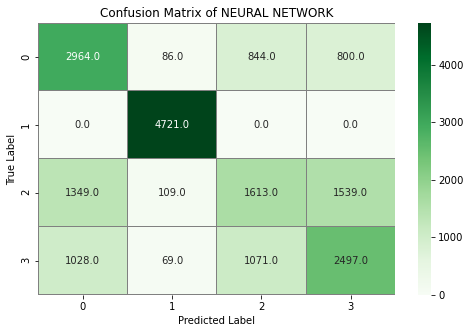

In [42]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_mtx4, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of NEURAL NETWORK")
plt.show()

# Neural Network Cross Validation score:

In [43]:
accuracy_train=cross_val_score(nn,x_train_std,y_train,cv=n_folds,scoring ='accuracy')

accuracy_test=cross_val_score(nn,x_test_std,y_test,cv=n_folds,scoring ='accuracy')

C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [44]:
print(accuracy_train.mean())

0.628640220132997


In [45]:
print(accuracy_test.mean())

0.6122525414660246


In [46]:
y_pred = nn.predict(x_test_std)

In [47]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('Results on the test set with Neural Network')
print(classification_report(y_test, y_pred))

Results on the test set with Neural Network
              precision    recall  f1-score   support

           0       0.55      0.63      0.59      4694
           1       0.95      1.00      0.97      4721
           2       0.46      0.35      0.40      4610
           3       0.52      0.54      0.53      4665

    accuracy                           0.63     18690
   macro avg       0.62      0.63      0.62     18690
weighted avg       0.62      0.63      0.62     18690



# HYPERPARAMETER OF NEURAL NET WORK-Multi Layer Perceptron(MLP)

In [48]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [49]:
clf = GridSearchCV(nn, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train_std, y_train)

C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [50]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [51]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.624 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.751 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.627 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.753 (+/-0.015) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.627 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.765 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.629 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 

In [52]:
print(clf.best_score_)

0.7668424673240083


In [53]:
acc = clf.score(x_train_std, y_train)
print('Neural network hyperparameter train score: ' + str(acc))

Neural network hyperparameter train score: 0.8792708094473745


In [55]:
scores = clf.score(x_test_std, y_test)
print('Neural network hyperparameter  test score: ' + str(scores))

Neural network hyperparameter  test score: 0.7781701444622793


# NEURAL NETWORK CROSS VALIDATION SCORE WITH HYPERPARAMETER

In [56]:
accuracy_train=cross_val_score(clf,x_train_std,y_train,cv=n_folds,scoring ='accuracy')

accuracy_test=cross_val_score(clf,x_test_std,y_test,cv=n_folds,scoring ='accuracy')

C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [57]:
print(accuracy_train.mean())

0.7698463655124972


In [58]:
print(accuracy_test.mean())

0.7101123595505617


In [59]:
y_predNNHYP = clf.predict(x_test_std)

In [60]:
from sklearn.metrics import confusion_matrix
confusion_mtx4=confusion_matrix(y_test,y_predNNHYP)

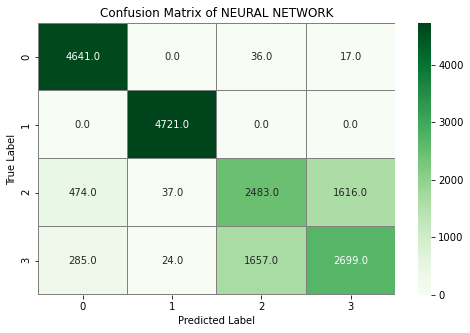

In [63]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_mtx4, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of NEURAL NETWORK")
plt.show()

In [62]:
y_pred = clf.predict(x_test_std)

from sklearn.metrics import classification_report
print('Results on the test set with hyperparameter with Neural Network:')
print(classification_report(y_test, y_predNNHYP))

Results on the test set with hyperparameter with Neural Network:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4694
           1       0.99      1.00      0.99      4721
           2       0.59      0.54      0.57      4610
           3       0.62      0.58      0.60      4665

    accuracy                           0.78     18690
   macro avg       0.77      0.78      0.77     18690
weighted avg       0.77      0.78      0.77     18690



# AUTOMATIC MACHINE LEARNING COMPARISON

In [112]:
# prepare models
models = []
models.append(('K-Nearest Neighbor', KNeighborsClassifier()))
models.append(('Gradient boosting Classifier', GradientBoostingClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=100)))
models.append(('Neural Network', MLPClassifier()))

In [113]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

In [114]:
for name, model in models:
    kfold = KFold(n_splits=5)
    result = cross_val_score(model, x_train_std, y_train, cv=kfold, scoring=scoring)
    results.append(result)
    names.append(name)
    results_nump = np.array(results)
    msg = "%s: %f , %f" % (name, results_nump.mean(), results_nump.std()) #two statistics: mean and std.deviation
    print(msg)

K-Nearest Neighbor: 0.714744 , 0.005191
Gradient boosting Classifier: 0.671784 , 0.043262
Random Forest Classifier: 0.728220 , 0.087307


C:\Users\couli\anaconda3\envs\R and Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\envs\R and Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\envs\R and Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\envs\R and Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network: 0.703514 , 0.086890


C:\Users\couli\anaconda3\envs\R and Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


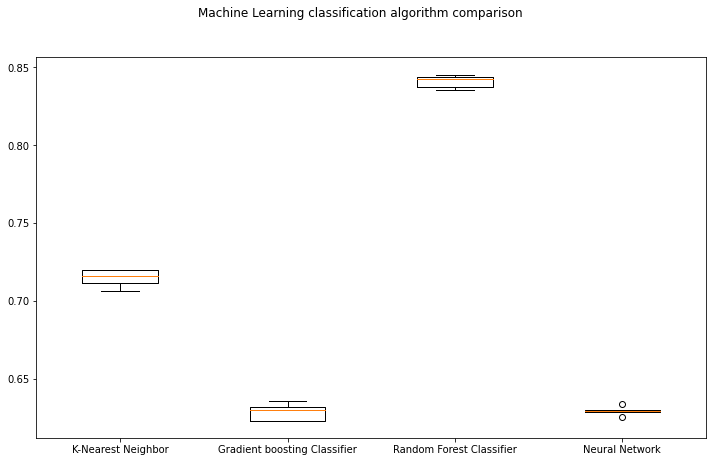

In [115]:
# boxplot algorithm comparison
fig = pyplot.figure(figsize = (12,7))
fig.suptitle('Machine Learning classification algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# COMPARISON MACHINE LEARNING MODEL WITH HYPERPARAMETER RESULT

In [116]:
# prepare models
models = []
models.append(('K-Nearest Neighbor', KNeighborsClassifier(n_neighbors = 1)))
models.append(('Gradient BoostingClassifier', GradientBoostingClassifier(n_estimators=10000)))
models.append(('Random ForestClassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)))
models.append(('Neural Network', MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= [50, 100, 50], learning_rate= 'constant', solver= 'adam')))

In [117]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

In [118]:
for name, model in models:
    kfold = KFold(n_splits=5)
    result = cross_val_score(model, x_train_std, y_train, cv=kfold, scoring=scoring)
    results.append(result)
    names.append(name)
    results_nump = np.array(results)
    msg = "%s: %f , %f" % (name, results_nump.mean(), results_nump.std()) #two statistics: mean and std.deviation
    print(msg)

K-Nearest Neighbor: 0.785577 , 0.006274
Gradient BoostingClassifier: 0.810250 , 0.025165
Random ForestClassifier: 0.820668 , 0.025370


C:\Users\couli\anaconda3\envs\R and Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\envs\R and Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\envs\R and Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\couli\anaconda3\envs\R and Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network: 0.807515 , 0.031747


C:\Users\couli\anaconda3\envs\R and Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


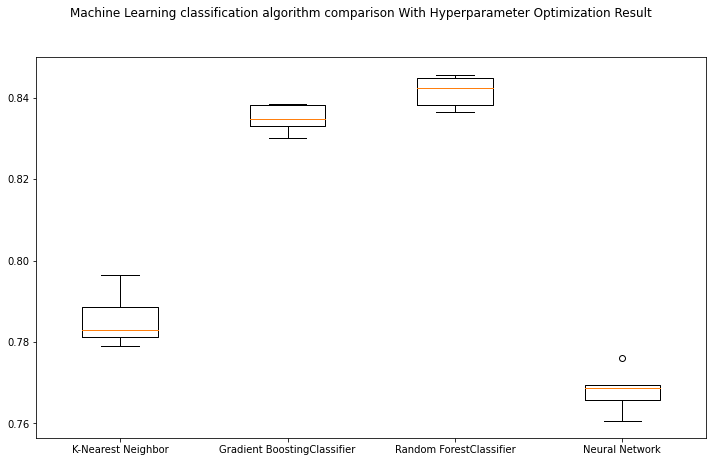

In [119]:
# boxplot algorithm comparison
fig = pyplot.figure(figsize = (12,7))
fig.suptitle('Machine Learning classification algorithm comparison With Hyperparameter Optimization Result')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<h3>ROC AUC FOR OUR FINAL BEST MODEL WITH HYPERPARAMETER<h3> <br>

1. ROC AUC FOR RANDOM FOREST CLASSIFIER
2. ROC AUC FOR GRADIENT BOOSTING CLASSIFIER

 

In [43]:
# Binarize the output
from sklearn.preprocessing import label_binarize
y_ros = label_binarize(y_ros, classes=[0, 1,2,3])
n_classes = y_ros.shape[1]

In [44]:
print(n_classes)

4


In [45]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=.3,
                                                    random_state=42)

In [46]:
#Nous pouvons maintenant standardiser les variables, 
#c'est-à-dire les centrer (ramener leur moyenne à 0) 
#et les réduire (ramener leur écart-type à 1), 
#afin qu'elles se placent toutes à peu près sur la même échelle
# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# ROC AUC FOR RANDOM FOREST CLASSIFIER WITH HYPERPARAMETER

In [133]:
# Learn to predict each class against the other
RFclassifier = OneVsRestClassifier(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))

In [134]:
y_score = RFclassifier.fit(X_train, y_train).predict_proba(X_test)

In [135]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

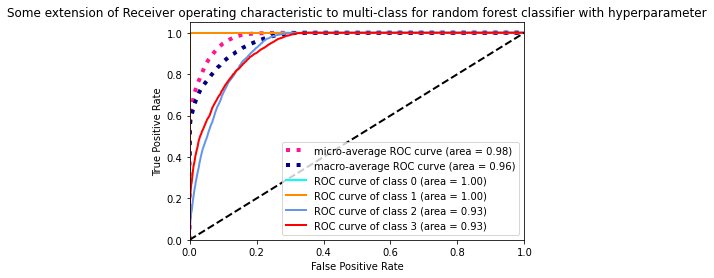

In [136]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
index=['No Injury',"Minor Injury","Severe Injury","Fatal Injury"]
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])



for i, color in zip(range(n_classes),colors):
    
    if i==0: 
        classe="A améliorer"
        
    if i==1:
        classe=="A corriger de manière urgente"
      
    if i==2 :
        classe=="Satisfaisant"
  
    if i==3 :
        classe=="Très satisfaisant"
      

    plt.plot(fpr[i], tpr[i], color=color,lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    
    #["Minor Injury","Severe Injury","Fatal Injury" ,"No Injury"]
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class for random forest classifier with hyperparameter')
plt.legend(loc="lower right")
plt.show()

# ROC AUC FOR GRADIENT BOOSTING CLASSIFIER WITH HYPERPARAMETER

In [40]:
# Learn to predict each class against the other
GBclassifier = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=10000))

In [41]:
y_score = GBclassifier.fit(X_train, y_train).predict_proba(X_test)

In [47]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

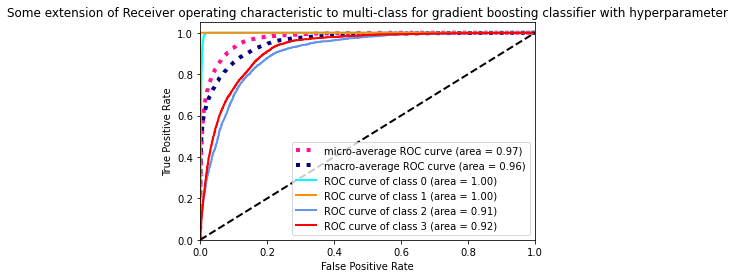

In [50]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
index=['No Injury',"Minor Injury","Severe Injury","Fatal Injury"]
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])



for i, color in zip(range(n_classes),colors):
    
    if i==0: 
        classe="A améliorer"
        
    if i==1:
        classe=="A corriger de manière urgente"
      
    if i==2 :
        classe=="Satisfaisant"
  
    if i==3 :
        classe=="Très satisfaisant"
      

    plt.plot(fpr[i], tpr[i], color=color,lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    
    #["Minor Injury","Severe Injury","Fatal Injury" ,"No Injury"]
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class for gradient boosting classifier with hyperparameter')
plt.legend(loc="lower right")
plt.show()

# CONCLUSION

We can conclude that after our study on the different models, random forest and gradient boosting remain the most efficient algorithms in classification with hyperparameter optimization. However, we increased the number of estimates which is the number of trees for the two models, but it turned out that these models also had difficulties during machine learning.


Building the most achivied model has not been possible due to:

The meticulousness, the tediousness and the iterativeness of the process requires relevant and powerful computation. Therefore, working from a local evironment with low GPU make it worst. This is the case of jupyther notebook.


Our future work : Hybrid with genetic algorithm + Neural Network(Multilayer perceptron)


# REFERENCE

[Reference 1](Adi, S., Adishesha, V., Bharadwaj, K., & Narayan, A. (2020). Earthquake Damage Prediction Using Random Forest and Gradient Boosting Classifier. American Journal of Biological and Environmental Statistics, 6, 58. https://doi.org/10.11648/j.ajbes.20200603.14) <br>

[Reference 2](Bergstra, J., & Bengio, Y. (s.d.). Random Search for Hyper-Parameter Optimization. 25)<br>

[Reference 3](A brief introduction to Multilayer Perceptrons. https://doi.org/10.17632/xszb89kvhk.1) <br>


[Reference 4](Khorshidi, H., & Aickelin, U. (2020). Synthetic Over-sampling with the Minority and Majority classes for imbalance problems.) <br>

[Reference 5](Pulabaigari, V., & T, H. S. (2011). An Improvement to k-Nearest Neighbor Classifier. In 2011 IEEE Recent Advances in Intelligent Computational Systems, RAICS 2011. https://doi.org/10.1109/RAICS.2011.6069307)